<h1> <div style="text-align: center"> <font color=darkblue> <ins> Portfolio (Python): <font color=black> Project 1</font> </div> <ins>

<h2> Welcome

- In this short Python Project I went through one of my real job tasks that I did some time ago. 
- (The Data however was drastically reduced and changed for confidentiality reasons). 
- The project is aimed to demonstrate my knowledge of Python and the respective libraries.

<h1> <div style="text-align: right"> <font color=brown> <ins> Setup Working Environment </font> </div> <ins>

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import missingno

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display as dsp

In [2]:
PATH = "/Users/stard/Desktop/Python_Portfolio/"

In [3]:
class bcolors:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    WARNING = '\033[93m'

In [4]:
styles = [dict(selector="caption", 
    props=[("text-align", "center"),
    ("font-size", "125%"),
    ("color", 'black')])] 

<h1> <div style="text-align: center"> <font color=darkblue> <ins> Part 1 <font color=black> Import, Read and Modify Data </font> </div> <ins>

In [5]:
data1 = pd.read_csv(PATH + "portfolio_data1.csv")
data2 = pd.read_csv(PATH + "portfolio_data2.csv")
data3 = pd.read_csv(PATH + "portfolio_data3.csv")

In [6]:
float_format_data1 = dict.fromkeys(data1.select_dtypes('float').columns, "{:1}")
float_format_data2 = dict.fromkeys(data2.select_dtypes('float').columns, "{:1}")
float_format_data3 = dict.fromkeys(data3.select_dtypes('float').columns, "{:1}")

<h3> Preview of data

In [7]:
dsp(data1.head(3).style.
    set_caption("Data 1 Preview").set_table_styles(styles).format(float_format_data1).hide_index())
dsp(data2.head(3).style.
    set_caption("Data 2 Preview").set_table_styles(styles).format(float_format_data2).hide_index())
dsp(data3.head(3).style.
    set_caption("Data 3 Preview").set_table_styles(styles).format(float_format_data3).hide_index())

k01,k21,k31,k71,k81,year,ID
3.0,2.0,3.0,7.0,98.0,2019,19988054
2.0,1.0,3.0,21.0,6.0,2019,19988054
1.0,2.0,1.0,49.0,5.0,2019,19988054


k01,c31,c51,c91,year,ID
1.0,nan,nan,5.0,2019,19988054
2.0,nan,nan,42.0,2019,19988054
3.0,nan,nan,nan,2019,19988054


k01,k1_1,k1_2,k1_3,k17,k17_1,k20_1,k20_4,k20_6,k20_7,k20_8,year,ID
3.0,2.0,2.0,nan,3.0,nan,nan,nan,nan,nan,nan,2019,19988054
2.0,2.0,2.0,nan,3.0,nan,nan,nan,nan,nan,nan,2019,19988054
1.0,2.0,2.0,nan,3.0,nan,nan,nan,nan,nan,nan,2019,19988054


- <h3> <font color=darkyellow> Important Note: </font> In each dataframe we have <font color=darkyellow> ID</font>,<font color=darkyellow> year </font> and <font color=darkyellow> k01 </font> (which is connected to unique ID)

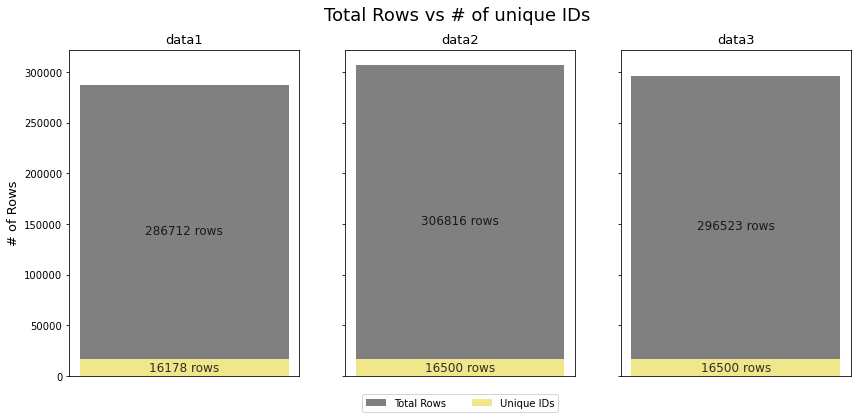

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (14, 6))

ax1.bar([1], data1.shape[0], color = "gray", label = "Total Rows")
ax1.bar([1], data1["ID"].nunique(), color = "khaki", label = "Unique IDs")

ax2.bar([1], data2.shape[0], color = "gray")
ax2.bar([1], data2["ID"].nunique(), color = "khaki")

ax3.bar([1], data3.shape[0], color = "gray")
ax3.bar([1], data3["ID"].nunique(), color = "khaki")

ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])

ax1.legend()

ax1.set_ylabel("# of Rows", fontsize = 13)

ax1.set_title("data1", fontsize = 13)
ax2.set_title("data2", fontsize = 13)
ax3.set_title("data3", fontsize = 13)


for rect in ax1.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = f'{height} rows'
    label_x = x + width / 2
    label_y = y + height / 2
    if height > 0:
        ax1.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12, 
                 color = 'black', alpha = 0.8)


for rect in ax2.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = f'{height} rows'
    label_x = x + width / 2
    label_y = y + height / 2
    if height > 0:
        ax2.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12, 
                 color = 'black', alpha = 0.8)
        
for rect in ax3.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = f'{height} rows'
    label_x = x + width / 2
    label_y = y + height / 2
    if height > 0:
        ax3.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12, 
                 color = 'black', alpha = 0.8)

ax1.legend(mode = "expand", ncol = 2, bbox_to_anchor = ([1.25, -0.14, 0.9, 0.1]))

fig.suptitle("Total Rows vs # of unique IDs", y = 0.98, x = 0.51, fontsize = 18)

plt.show()

---

<h1> <div style="text-align: right"> <font color=brown> <ins> Merge <font color=black> Data </font> </div> <ins>

<h3> We want to take a look how many values do we lose from both dataframes if we do inner join

In [9]:
data_merged_check = data3.merge(data2[['k01', 'c31', 'c51', 'c91', 'year', 'ID']], 
                                on=["year", "ID", "k01"], 
                                how='outer', indicator=True)

d={"left_only":"Only present in data3", 
   "right_only":"Only present in data2","both":"Present in Both data"}
data_merged_check['_merge'] = data_merged_check['_merge'].map(d)

In [10]:
dsp(pd.DataFrame(data_merged_check.groupby("_merge")
                 ["ID"].count()).rename({"ID":"ID_Count"}, axis = 1).style.
    set_caption("Status of IDs from merge between data 3 and data 2").set_table_styles(styles))
print(bcolors.BOLD + "That means that if we do inner join we lose:", 
     pd.DataFrame(data_merged_check.groupby("_merge")["ID"].count())["ID"][0] + 
     pd.DataFrame(data_merged_check.groupby("_merge")["ID"].count())["ID"][1], "rows.")

,ID_Count
_merge,
Only present in data3,491
Only present in data2,11077
Present in Both data,296034


That means that if we do inner join we lose: 11568 rows.


<h2> <font color=brown> Merge Method used: Inner

In [11]:
data_merged = data3.merge(data2[['k01', 'c31', 'c51', 'c91', 'year', 'ID']], 
                          on=["year", "ID", "k01"], 
                          how='inner')

---

<h3> We want to take a look how many values do we lose from both dataframes if we do next inner join

In [12]:
data_merged_check = data_merged.merge(data1[['k01', 'k21', 'k31', 'k71', 'k81', 'year', 'ID']], 
                                      on=["ID", "year", "k01"], 
                                      how='outer', indicator=True)
d={"left_only":"Only present in data3/2 (inner merge)", 
   "right_only":"Only present in data1","both":"Present in Both data"}
data_merged_check['_merge'] = data_merged_check['_merge'].map(d)

In [13]:
dsp(pd.DataFrame(data_merged_check.groupby("_merge")
                 ["ID"].count()).rename({"ID":"ID_Count"}, axis = 1).style.
    set_caption("Status of IDs from merge between data3/2 (inner merge) and data 1").set_table_styles(styles))
print(bcolors.BOLD + "That means that if we do inner join we further lose:", 
     pd.DataFrame(data_merged_check.groupby("_merge")["ID"].count())["ID"][0] + 
     pd.DataFrame(data_merged_check.groupby("_merge")["ID"].count())["ID"][1], "rows.")

,ID_Count
_merge,
Only present in data3/2 (inner merge),12245
Only present in data1,3216
Present in Both data,283789


That means that if we do inner join we further lose: 15461 rows.


<h2> <font color=brown> Merge Method used: Inner

In [14]:
data_merged = data_merged.merge(data1[['k01', 'k21', 'k31', 'k71', 'k81', 'year', 'ID']], 
                                on=["ID", "year", "k01"], 
                                how='inner')

In [15]:
float_format_data_merged = dict.fromkeys(data_merged.select_dtypes('float').columns, "{:1}")

---

<h3> We need to add to our ID <font color=red> 105</font>, but only for years 2013 (included) and above

In [16]:
dsp(data_merged.filter(["ID", "year"]).query("year == 2014").head(1).style.
    hide_index().set_caption("Before").set_table_styles(styles))
dsp(data_merged.filter(["ID", "year"]).query("year == 2012").head(1).style.
    hide_index().set_caption("Before").set_table_styles(styles))

ID,year
19988054,2014


ID,year
7056,2012


In [17]:
data_merged['ID_new'] = np.where(data_merged['year'] > 2012, 
                                   data_merged['ID'] + 105, data_merged['ID'])  # new hh_code column
data_merged.drop('ID', axis = 1, inplace = True)  # drop old hh_code column
data_merged.rename(columns={'ID_new': 'ID'}, inplace = True)

In [18]:
dsp(data_merged.filter(["ID", "year"]).query("year == 2014").head(1).style.
    hide_index().set_caption("After").set_table_styles(styles))
dsp(data_merged.filter(["ID", "year"]).query("year == 2012").head(1).style.
    hide_index().set_caption("After").set_table_styles(styles))

ID,year
19988159,2014


ID,year
7056,2012


---

<h3> We need to replace <font color=red> _ </font> with <font color=red> 0 </font> in the column's names

In [19]:
dsp(data_merged.filter(like='_').head(1).style.
    hide_index().set_caption("Before").set_table_styles(styles).format(float_format_data_merged))

k1_1,k1_2,k1_3,k17_1,k20_1,k20_4,k20_6,k20_7,k20_8
2.0,2.0,nan,nan,nan,nan,nan,nan,nan


In [20]:
data_merged.columns = [x.replace('_', '0') for x in data_merged.columns]

In [21]:
float_format = dict.fromkeys(data_merged.select_dtypes('float').columns, "{:1}")

dsp(data_merged.filter(like='0').head(1).style.
    hide_index().set_caption("After").set_table_styles(styles).format(float_format))

k01,k101,k102,k103,k1701,k2001,k2004,k2006,k2007,k2008
3.0,2.0,2.0,nan,nan,nan,nan,nan,nan,nan


---

<h1> <div style="text-align: right"> <font color=brown> <ins> Check for <font color=black> Missing Values and Duplicates </font> </div> <ins>

<h3> Look at the missing values

In [22]:
missing_data_merged = data_merged.isnull().sum().sort_values(ascending = False)
missing_data_merged_df = (pd.DataFrame(missing_data_merged[missing_data_merged > 0]).
                          rename({0:"# of Zeros"}, axis = 1))
missing_data_merged_df["% of Zeros"] = round((missing_data_merged_df["# of Zeros"] / 
data_merged.shape[0]) * 100, 3)
missing_data_merged_df.style.format({"% of Zeros": '{:1}%'})

,# of Zeros,% of Zeros
k2008,264356,93.152%
k2004,264311,93.136%
k2001,260928,91.944%
c51,254990,89.852%
k2007,254473,89.67%
k1701,250852,88.394%
c31,245277,86.429%
k2006,241356,85.048%
k103,227423,80.138%
c91,55547,19.573%


In [23]:
data_merged.sort_values(["year", "ID", "k01"], axis=0, ascending=[False, True, True], inplace=True)

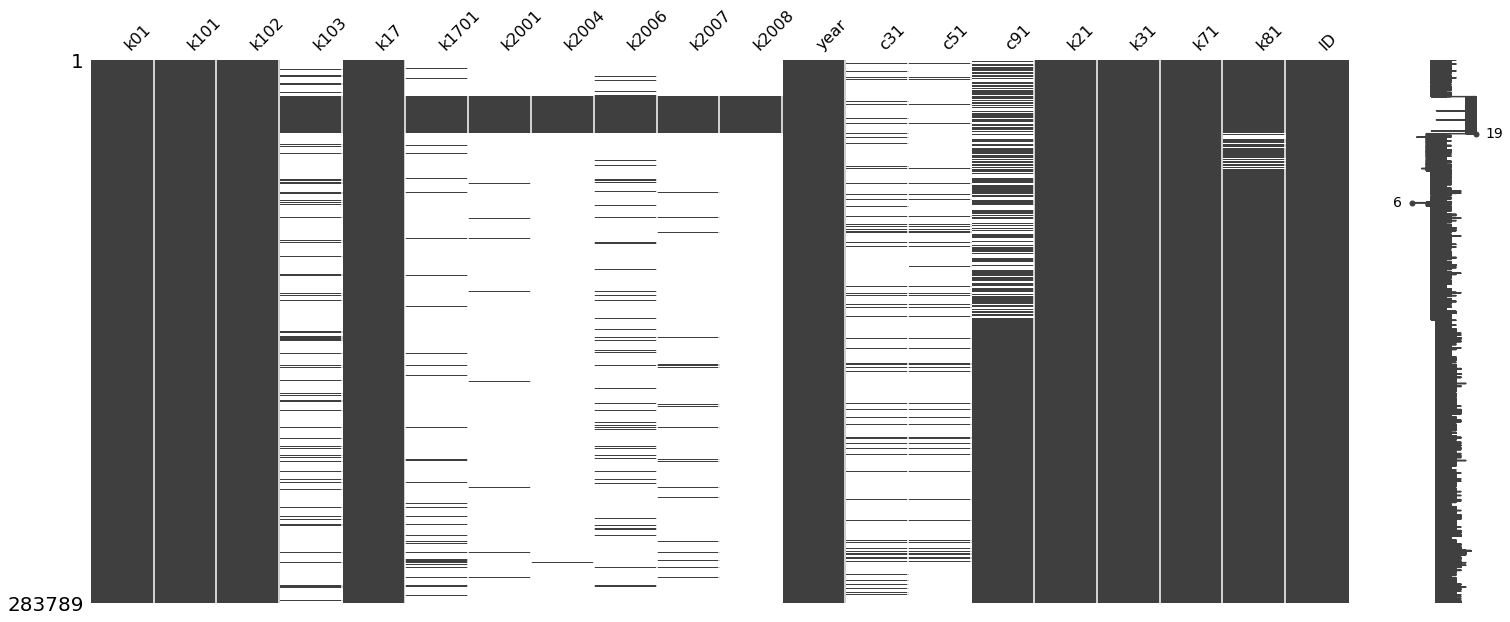

In [24]:
missingo_data_merged = missingno.matrix(data_merged)
missingo_data_merged;

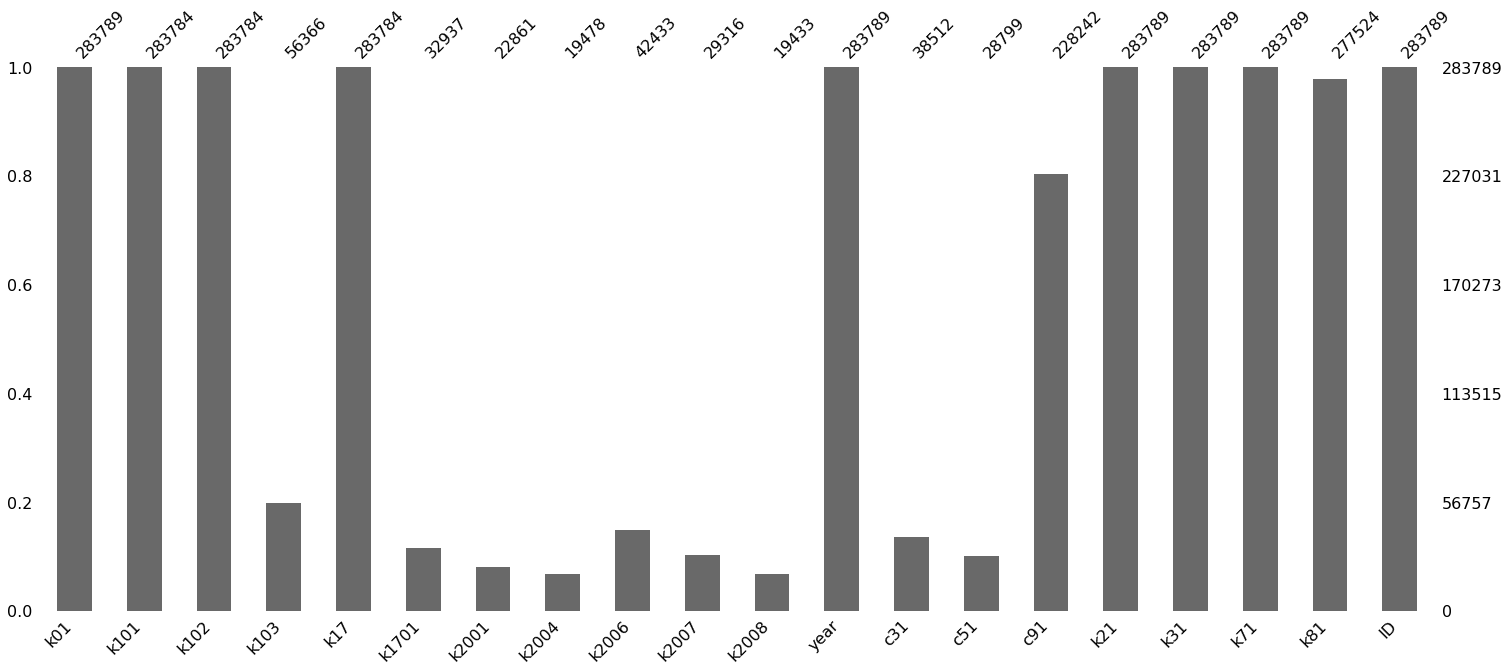

In [25]:
missingno.bar(data_merged);

In [26]:
data_check = data_merged.filter(["year", "ID",
                                 'k103', 'k1701', 'k2001', 
                                 'k2004','k2006', 'k2007', 'k2008'])
data_merged_null_data = data_check[data_check.isnull().any(axis=1)]
dsp(pd.DataFrame(data_merged_null_data["year"].value_counts()).rename({"year":"ID_Count"}, axis = 1).T.
    style.set_caption("# of NaNs for selected above columns in accordance to year").set_table_styles(styles))

,2013,2017,2016,2015,2019,2014,2009,2005,2006,2011,2010,2012,2008,2007,2018
ID_Count,19878,19393,19341,19327,19270,19267,18917,18850,18565,18547,18476,18457,18157,17976,3


In [27]:
dsp(data_check.query("year == 2018").head().style.format(float_format).hide_index())
print(bcolors.BOLD + "We have 0s instead of NaNs in the year of 2018")

year,ID,k103,k1701,k2001,k2004,k2006,k2007,k2008
2018,19988159,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,19988159,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,19988159,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,19989159,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,19990159,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We have 0s instead of NaNs in the year of 2018


---

<h3> Check for duplicates

In [28]:
data_merged_duplicates = data_merged[data_merged.duplicated()]

print(bcolors.BOLD + "There are in total -", 
      data_merged_duplicates["ID"].count(), "duplicate values")

There are in total - 0 duplicate values


---

<h3> Dealing with the Semi-Duplicate Rows where the difference is between NaN and some value.

In [29]:
data_merged_check_dupl = data_merged.copy()

Example:

In [30]:
def highlight_cells_one(x):
    data_merged = x.copy()
    data_merged.loc[:,:] = '' 
    data_merged.iloc[:, 14] = 'background-color: khaki'
    return data_merged

def highlight_cells_two(x):
    data_merged = x.copy()
    data_merged.loc[:,:] = '' 
    data_merged.iloc[:, 8] = 'background-color: khaki'
    return data_merged

In [31]:
dsp(data_merged.query("ID == 110270159 and year == 2017 and k01 == 1").
    style.apply(highlight_cells_one, axis = None).format(float_format).hide_index())
print(bcolors.BOLD + "Everything is the same except column (c91)")

k01,k101,k102,k103,k17,k1701,k2001,k2004,k2006,k2007,k2008,year,c31,c51,c91,k21,k31,k71,k81,ID
1.0,1.0,2.0,nan,3.0,nan,nan,nan,nan,nan,nan,2017,nan,nan,1.0,2.0,1.0,46.0,3.0,110270159
1.0,1.0,2.0,nan,3.0,nan,nan,nan,nan,nan,nan,2017,nan,nan,nan,2.0,1.0,46.0,3.0,110270159


Everything is the same except column (c91)


In [32]:
print(bcolors.BOLD + "We have", 
      data_merged[data_merged_check_dupl.duplicated(subset=['year', 'ID', 'k01'], keep="first")].shape[0], 
      "semi-duplicate rows.")

We have 293 semi-duplicate rows.


In [33]:
data_merged[data_merged_check_dupl.duplicated(subset=['year', 'ID', 'k01'], 
                                              keep="first")].groupby("year")["ID"].count()

year
2013    291
2016      1
2017      1
Name: ID, dtype: int64

<h3> The goal is to take semi-duplicate rows and drop the one which contains NaN over some value in another row. 

In [34]:
data_merged = (data_merged.sort_values(list(data_merged.columns), ascending = False).
               drop_duplicates(subset=['year', 'ID', 'k01'], keep="first"))

In [35]:
dsp(data_merged_check_dupl.query("ID == 110270159 and year == 2017 and k01 == 1").
    style.apply(highlight_cells_one, axis = None).format(float_format).
    set_caption("With Semi-Duplicates").set_table_styles(styles).hide_index())
dsp(data_merged.query("ID == 110270159 and year == 2017 and k01 == 1").
    style.apply(highlight_cells_one, axis = None).format(float_format).
    set_caption("Without Semi-Duplicates").set_table_styles(styles).hide_index())
print(bcolors.BOLD + "We took the row with the value")

k01,k101,k102,k103,k17,k1701,k2001,k2004,k2006,k2007,k2008,year,c31,c51,c91,k21,k31,k71,k81,ID
1.0,1.0,2.0,nan,3.0,nan,nan,nan,nan,nan,nan,2017,nan,nan,1.0,2.0,1.0,46.0,3.0,110270159
1.0,1.0,2.0,nan,3.0,nan,nan,nan,nan,nan,nan,2017,nan,nan,nan,2.0,1.0,46.0,3.0,110270159


k01,k101,k102,k103,k17,k1701,k2001,k2004,k2006,k2007,k2008,year,c31,c51,c91,k21,k31,k71,k81,ID
1.0,1.0,2.0,nan,3.0,nan,nan,nan,nan,nan,nan,2017,nan,nan,1.0,2.0,1.0,46.0,3.0,110270159


We took the row with the value


In [36]:
dsp(data_merged_check_dupl.query("ID == 60345159 and year == 2013 and k01 == 7").style.
    apply(highlight_cells_two, axis = None).format(float_format).
    set_caption("With Semi-Duplicates").set_table_styles(styles).hide_index())
dsp(data_merged.query("ID == 60345159 and year == 2013 and k01 == 7").style.
    apply(highlight_cells_two, axis = None).format(float_format).
    set_caption("Without Semi-Duplicates").set_table_styles(styles).hide_index())
print(bcolors.BOLD + "We took the row with the value")

k01,k101,k102,k103,k17,k1701,k2001,k2004,k2006,k2007,k2008,year,c31,c51,c91,k21,k31,k71,k81,ID
7.0,1.0,2.0,nan,3.0,nan,nan,nan,nan,nan,nan,2013,2.0,8.0,nan,2.0,8.0,1.0,98.0,60345159
7.0,1.0,2.0,nan,3.0,nan,nan,nan,6.0,nan,nan,2013,2.0,8.0,nan,2.0,8.0,1.0,98.0,60345159


k01,k101,k102,k103,k17,k1701,k2001,k2004,k2006,k2007,k2008,year,c31,c51,c91,k21,k31,k71,k81,ID
7.0,1.0,2.0,nan,3.0,nan,nan,nan,6.0,nan,nan,2013,2.0,8.0,nan,2.0,8.0,1.0,98.0,60345159


We took the row with the value


---

<h1> <div style="text-align: center"> <font color=darkblue> <ins> Part 2 <font color=black> Create New Custom Columns Based on a Condition </font> </div> <ins>

<h2> Creating [Group 1]

- **k01**
- **c91**
- **k71**

In [37]:
def Condition_1(data_merged):
    if ((data_merged['k01'] == 1) & ((data_merged['c91'] == 42)| 
                                     (data_merged['c91'] == 6) | 
                                     (data_merged['c91'] == 7) |
                                     (data_merged['c91'] == 8)) & 
        (data_merged['k71'] >= 7) & (data_merged['year'] >= 2013)):
        return 1
    
    elif ((data_merged['k01'] == 1) & ((data_merged['c91'] == 42)| 
                                       (data_merged['c91'] == 6) | 
                                       (data_merged['c91'] == 7) |
                                       (data_merged['c91'] == 8) |
                                       (data_merged['c91'] == 9)) & 
          (data_merged['k71'] >= 7) & (2007 <= data_merged['year'] <= 2012)):
        return 1
    
    elif ((data_merged['k01'] == 1) & ((data_merged['c91'] == 6) | 
                                       (data_merged['c91'] == 7) |
                                       (data_merged['c91'] == 8) |
                                       (data_merged['c91'] == 9))
          & (data_merged['k71'] >= 7) & (data_merged['year'] <= 2006)):
        return 1
    
    elif (((data_merged['k01'] == 1) | (np.isnan(data_merged['k01']) == True)) & 
          (((data_merged['c91'] == 42)| 
            (data_merged['c91'] == 6) |
            (data_merged['c91'] == 7) |
            (data_merged['c91'] == 8))| (np.isnan(data_merged['c91']) == True)) & 
          ((data_merged['k71'] >= 7) | (np.isnan(data_merged['k71']) == True)) & 
          ((data_merged['year'] >= 2013) | (np.isnan(data_merged['year']) == True))):
        return np.nan   
    
    elif (((data_merged['k01'] == 1) | (np.isnan(data_merged['k01']) == True)) & 
          (((data_merged['c91'] == 42)| 
            (data_merged['c91'] == 6) |
            (data_merged['c91'] == 7) |
            (data_merged['c91'] == 8) | 
            (data_merged['c91'] == 9))| (np.isnan(data_merged['c91']) == True)) & 
          ((data_merged['k71'] >= 7) | (np.isnan(data_merged['k71']) == True)) & 
          ((2007 <= data_merged['year'] <= 2012) | (np.isnan(data_merged['year']) == True))):
        return np.nan
    
    elif (((data_merged['k01'] == 1) | (np.isnan(data_merged['k01']) == True)) & 
          (((data_merged['c91'] == 6) | 
            (data_merged['c91'] == 7) |
            (data_merged['c91'] == 8) |
            (data_merged['c91'] == 9))| (np.isnan(data_merged['c91']) == True)) & 
          ((data_merged['k71'] >= 7) | (np.isnan(data_merged['k71']) == True)) & 
          ((data_merged['year'] <= 2006) | (np.isnan(data_merged['year']) == True))):
        return np.nan 
    
    else:
        return 0

In [38]:
data_merged['Group1'] = data_merged.apply(Condition_1, axis=1)

In [39]:
dsp(pd.DataFrame(data_merged.groupby('Group1', dropna=False)
                 ["ID"].count()).rename({"ID":"ID_Count"}, axis = 1).style.
    set_caption("Distribution of Group1 values").set_table_styles(styles))

,ID_Count
Group1,
0.0,273877
1.0,9131
nan,488


In [40]:
data_merged_graph_sum = data_merged.groupby("Group1", dropna = False)["ID"].count()

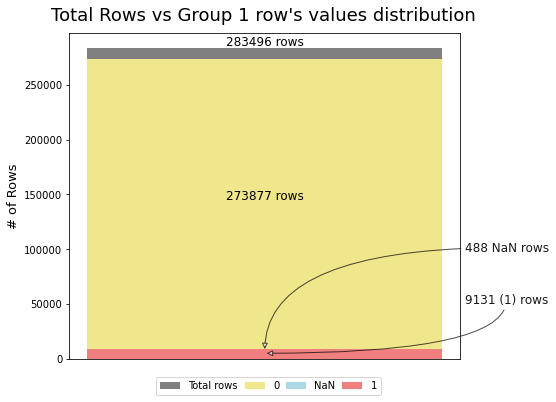

In [41]:
fig, ax = plt.subplots(figsize = (7, 6))

ax.bar([1], data_merged.shape[0], label = 'Total rows', color = "gray")
ax.bar([1], data_merged_graph_sum[0], label = '0', color = "khaki")
ax.bar([1], data_merged_graph_sum[np.nan], label = 'NaN', color = "lightblue")
ax.bar([1], data_merged_graph_sum[1], label = '1', color = "lightcoral")

ax.set_xticks([])

ax.set_ylabel("# of Rows", fontsize = 13)

ax.legend()

ax.text(0.5, 0.97, f'{data_merged.shape[0]} rows', horizontalalignment = 'center',
     verticalalignment = 'center', fontsize = 12, transform = ax.transAxes)
ax.text(0.5, 0.5, f'{data_merged_graph_sum[0]} rows', horizontalalignment = 'center',
     verticalalignment = 'center', fontsize = 12, transform = ax.transAxes)

ax.annotate(f'{data_merged_graph_sum[np.nan]} NaN rows', 
            xy=(1, 7000), xytext=(200, 100), textcoords = ('offset pixels'), fontsize = 12, alpha = 0.9,
            arrowprops = dict(facecolor = 'black', arrowstyle="-|>", alpha = 0.7, fc="w",
                              connectionstyle = "angle3, angleA=0, angleB=90"))
ax.annotate(f'{data_merged_graph_sum[1]} (1) rows', 
            xy=(1, 5000), xytext=(200, 50), textcoords = ('offset pixels'), fontsize = 12, alpha = 0.9,
            arrowprops = dict(facecolor = 'black', arrowstyle="-|>", alpha = 0.7, fc="w",
                              connectionstyle = "angle3, angleA=-90, angleB=180"))
    
ax.legend(mode = "expand", ncol = 4, bbox_to_anchor = ([0.21, -0.14, 0.6, 0.1]))

fig.suptitle("Total Rows vs Group 1 row's values distribution", y = 0.94, x = 0.51, fontsize = 18)

plt.show()

---

<h2> Creating [Group 2]

- **k17**
- **k1701**

In [42]:
def Condition_2(data_merged):
    if (((data_merged['k17'] == 1) |
         (data_merged['k17'] == 2)) & (data_merged['k1701'] == 1) & (data_merged['year'] >= 2007)):
        return 1
    
    elif (((data_merged['k17'] == 1) |
           (data_merged['k17'] == 2)) & ((data_merged['k1701'] == 1) |
                                         (data_merged['k1701'] == 2)) & (data_merged['year'] <= 2006)):
        return 1
    
    elif (((np.isnan(data_merged['k17']) == True) | 
           ((data_merged['k17'] == 1) |
            (data_merged['k17'] == 2))) & 
          ((np.isnan(data_merged['k1701']) == True) | (data_merged['k1701'] == 1)) & 
          ((np.isnan(data_merged['year']) == True) | (data_merged['year'] >= 2007))):
        return np.nan
    
    elif (((np.isnan(data_merged['k17']) == True) | 
           ((data_merged['k17'] == 1) |
            (data_merged['k17'] == 2))) & 
          ((np.isnan(data_merged['k1701']) == True) | ((data_merged['k1701'] == 1) | 
                                                       (data_merged['k1701'] == 2))) & 
          ((np.isnan(data_merged['year']) == True) | (data_merged['year'] <= 2006))):                                                                
        return np.nan
    
    else:
        return 0

In [43]:
data_merged['Group2'] = data_merged.apply(Condition_2, axis=1)

In [44]:
dsp(pd.DataFrame(data_merged.groupby('Group2', dropna=False)
                 ["ID"].count()).rename({"ID":"ID_Count"}, axis = 1).style.
    set_caption("Distribution of Group2 values").set_table_styles(styles))

,ID_Count
Group2,
0.0,278330
1.0,2632
nan,2534


In [45]:
data_merged_graph2_sum = data_merged.groupby("Group2", dropna = False)["ID"].count()

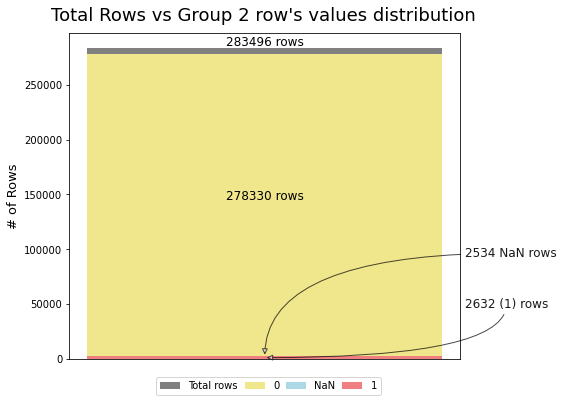

In [46]:
fig, ax = plt.subplots(figsize = (7, 6))

ax.bar([1], data_merged.shape[0], label = 'Total rows', color = "gray")
ax.bar([1], data_merged_graph2_sum[0], label = '0', color = "khaki")
ax.bar([1], data_merged_graph2_sum[np.nan], label = 'NaN', color = "lightblue")
ax.bar([1], data_merged_graph2_sum[1], label = '1', color = "lightcoral")

ax.set_xticks([])

ax.set_ylabel("# of Rows", fontsize = 13)

ax.legend()

ax.text(0.5, 0.97, f'{data_merged.shape[0]} rows', horizontalalignment = 'center',
     verticalalignment = 'center', fontsize = 12, transform = ax.transAxes)
ax.text(0.5, 0.5, f'{data_merged_graph2_sum[0]} rows', horizontalalignment = 'center',
     verticalalignment = 'center', fontsize = 12, transform = ax.transAxes)

ax.annotate(f'{data_merged_graph2_sum[np.nan]} NaN rows', 
            xy=(1, 1900), xytext=(200, 100), textcoords = ('offset pixels'), fontsize = 12, alpha = 0.9,
            arrowprops = dict(facecolor = 'black', arrowstyle="-|>", alpha = 0.7, fc="w",
                              connectionstyle = "angle3, angleA=0, angleB=90"))
ax.annotate(f'{data_merged_graph2_sum[1]} (1) rows', 
            xy=(1, 1000), xytext=(200, 50), textcoords = ('offset pixels'), fontsize = 12, alpha = 0.9,
            arrowprops = dict(facecolor = 'black', arrowstyle="-|>", alpha = 0.7, fc="w",
                              connectionstyle = "angle3, angleA=-90, angleB=180"))
    
ax.legend(mode = "expand", ncol = 4, bbox_to_anchor = ([0.21, -0.14, 0.6, 0.1]))

fig.suptitle("Total Rows vs Group 2 row's values distribution", y = 0.94, x = 0.51, fontsize = 18)

plt.show()

---

<h1> <div style="text-align: center"> <font color=darkblue> <ins> Part 3 <font color=black> Group Data with only unique IDs </font> </div> <ins>

<h2> <div style="text-align: left"> <font color=brown> <ins> Grouping <font color=black> data based on unique ID and lowest k01 </font> </div> <ins>

In [47]:
# Grouping by unique ID and the lowest available k01 value
data_merged_unique = data_merged.loc[data_merged.groupby(['year', 
                                                          "ID"])["k01"].idxmin()].reset_index(drop=True)

In [48]:
# Grouped data's unique k01
data_merged_unique["k01"].unique()

array([1., 2., 6., 3., 4., 5., 7.])

In [49]:
# UNgrouped data's unique k01
data_merged["k01"].unique()

array([20., 19., 18., 17., 16., 15., 14., 13., 12., 11., 10.,  9.,  8.,
        7.,  6.,  5.,  4.,  3.,  2.,  1.])

---

<h2> <div style="text-align: left"> <font color=brown> <ins> Reworking (Group 1 and Group 2 columns) <font color=black> <ins> (Moving 1s [k01 column] in accordance to their presence in the ungrouped data) </font> </div> <ins>

In [50]:
data_merged_unique_copy = data_merged_unique.copy()

In [51]:
Group1_unique_ID = data_merged.query("Group1 == 1").filter(["ID", "year", "Group1"]).reset_index(drop = True)
Group1_unique_ID = Group1_unique_ID.drop_duplicates()

Group2_unique_ID = data_merged.query("Group2 == 1").filter(["ID", "year", "Group2"]).reset_index(drop = True)
Group2_unique_ID = Group2_unique_ID.drop_duplicates()

In [52]:
data_merged_unique = data_merged_unique.merge(Group1_unique_ID[['ID', 'year', 'Group1']], 
                                              on = ["ID", "year"],
                                              how = "left") 
data_merged_unique = data_merged_unique.merge(Group2_unique_ID[['ID', 'year', 'Group2']], 
                                              on = ["ID", "year"],
                                              how = "left") 

In [53]:
data_merged_unique['Group1_x'] = np.where(data_merged_unique['Group1_y'] == data_merged_unique['Group1_y'], 
                                          data_merged_unique['Group1_y'], data_merged_unique['Group1_x'])
data_merged_unique['Group2_x'] = np.where(data_merged_unique['Group2_y'] == data_merged_unique['Group2_y'], 
                                          data_merged_unique['Group2_y'], data_merged_unique['Group2_x'])

In [54]:
data_merged_unique.drop(['Group1_y', 'Group2_y'], axis=1, inplace=True)

In [55]:
data_merged_unique.rename({'Group1_x': "Group1", 'Group2_x': "Group2"}, axis=1, inplace=True)

In [56]:
float_format_unique = dict.fromkeys(data_merged_unique.select_dtypes('float').columns, "{:1}")

def highlight_cells_three(x):
    data_merged_unique = x.copy()
    data_merged_unique.loc[:,:] = '' 
    data_merged_unique.iloc[0:2, 2:4] = 'background-color: khaki'
    return data_merged_unique

In [57]:
def highlight_cells_four(x):
    data_merged_unique = x.copy()
    data_merged_unique.loc[:,:] = '' 
    data_merged_unique.iloc[2, 2:4] = 'background-color: khaki'
    return data_merged_unique

In [58]:
dsp(data_merged.filter(["year", "ID", "k01", "Group2"]).query("year == 2006 and ID == 47418").style.
    apply(highlight_cells_three, axis = None).format(float_format_unique).
    set_caption("Before grouping by unique IDs and year").set_table_styles(styles).hide_index())
dsp(data_merged_unique.filter(["year", "ID", "k01", "Group2"]).query("year == 2006 and ID == 47418").style.
    format(float_format_unique).set_caption("After grouping by unique IDs and year").
    set_table_styles(styles).hide_index())

year,ID,k01,Group2
2006,47418,10.0,1.0
2006,47418,9.0,1.0
2006,47418,8.0,0.0
2006,47418,7.0,0.0
2006,47418,6.0,0.0
2006,47418,2.0,0.0
2006,47418,1.0,0.0


year,ID,k01,Group2
2006,47418,1.0,1.0


In [59]:
dsp(data_merged.filter(["year", "ID", "k01", "Group2"]).query("year == 2017 and ID == 20286159").style.
    apply(highlight_cells_four, axis = None).format(float_format_unique).
    set_caption("Before grouping by unique IDs and year").set_table_styles(styles).hide_index())
dsp(data_merged_unique.filter(["year", "ID", "k01", "Group2"]).query("year == 2017 and ID == 20286159").style.
    format(float_format_unique).set_caption("After grouping by unique IDs and year").
    set_table_styles(styles).hide_index())

year,ID,k01,Group2
2017,20286159,7.0,0.0
2017,20286159,6.0,0.0
2017,20286159,5.0,1.0
2017,20286159,4.0,0.0
2017,20286159,3.0,0.0
2017,20286159,2.0,0.0
2017,20286159,1.0,0.0


year,ID,k01,Group2
2017,20286159,1.0,1.0


---

<h3> Summary

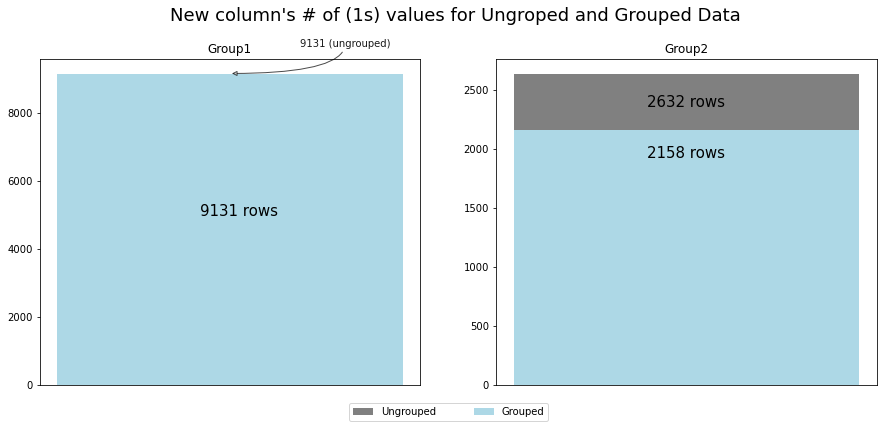

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = False, figsize = (15, 6))

ax1.bar([1], int(round(data_merged["Group1"].sum())), label = 'Ungrouped', color = "gray")
ax1.bar([1], int(round(data_merged_unique["Group1"].sum())), label = 'Grouped', color = "lightblue")

ax2.bar([1], int(round(data_merged["Group2"].sum())), label = 'Ungrouped', color = "gray")
ax2.bar([1], int(round(data_merged_unique["Group2"].sum())), label = 'Grouped', color = "lightblue")

ax1.set_xticks([])
ax2.set_xticks([])
        
ax1.annotate(f'{int(round(data_merged["Group1"].sum()))} (ungrouped)', 
             xy=(1, 9150), xytext=(70, 27), textcoords = ('offset pixels'), fontsize = 10, alpha = 0.9,
             arrowprops = dict(facecolor = 'black', arrowstyle="-|>", alpha = 0.7, fc="w",
                              connectionstyle = "angle3, angleA=-90, angleB=180"))
ax1.text(0.45, 0.5, f'{int(round(data_merged_unique["Group1"].sum()))} rows', horizontalalignment = 'center',
     verticalalignment = 'center', fontsize = 15, transform = ax.transAxes, color = "black")

for rect in ax2.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = f'{height} rows'
    label_x = x + width / 2
    label_y = y + height / 1.1
    if height > 0:
        ax2.text(label_x, label_y, label_text, ha='center', va='center', fontsize=15)
    
ax1.legend(mode = "expand", ncol = 4, bbox_to_anchor = ([0.8, -0.14, 0.55, 0.1]))

ax1.set_title("Group1")
ax2.set_title("Group2")

fig.suptitle("New column's # of (1s) values for Ungroped and Grouped Data", y = 1, x = 0.51, fontsize = 18)

plt.show()

---

<h1> <div style="text-align: center"> <font color=darkblue> <ins> Part 4 <font color=black> Summary of Variables of Interest </font> </div> <ins>

In [74]:
data_merged_table = (data_merged_unique.groupby(["ID"]).
                    agg({'k71': ['median','max', 
                                lambda x: x.nlargest(2).min(), lambda x: x.nlargest(3).min(),
                                lambda x: x.nunique()],
                         "year": 'count'}).reset_index())

data_merged_table.columns = ['ID', 'median', "max", 
                             "second_largest", "third_largest", 'unique_k71', 'entries']

In [76]:
IDs_of_interest = data_merged_table[(data_merged_table['unique_k71'] != 1) & 
                                    (data_merged_table['unique_k71'] != data_merged_table['entries'])]

In [77]:
IDs_of_interest

,hh_code,median,max,second_largest,third_largest,unique_k71,entries
1,7056,66.5,69.0,68.0,67.0,7.0,8
3,7060,80.0,83.0,82.0,81.0,7.0,8
6,7063,45.0,48.0,47.0,46.0,6.0,7
8,7066,72.5,75.0,74.0,73.0,7.0,8
16,7075,80.0,82.0,82.0,80.0,4.0,5
...,...,...,...,...,...,...,...
16005,210182159,54.0,56.0,55.0,55.0,4.0,7
16031,210208159,38.0,40.0,39.0,38.0,5.0,7
16032,210209159,44.0,46.0,45.0,44.0,5.0,7
16065,210242159,58.0,60.0,59.0,58.0,5.0,7


---

In [61]:
missing_data_merged_unique = data_merged_unique.isnull().sum().sort_values(ascending = False)
missing_data_merged_unique_df = (pd.DataFrame(missing_data_merged_unique[missing_data_merged_unique > 0]).
                                 rename({0:"# of Zeros"}, axis = 1))
missing_data_merged_unique_df["% of Zeros"] = round((missing_data_merged_unique_df["# of Zeros"] / 
                                                     data_merged.shape[0]) * 100, 3)
missing_data_merged_unique_df.style.format({"% of Zeros": '{:1}%'})

,# of Zeros,% of Zeros
c51,74511,26.283%
c31,74500,26.279%
k2008,69459,24.501%
k2004,69453,24.499%
k2001,68103,24.023%
k2007,66066,23.304%
k1701,63885,22.535%
k2006,62472,22.036%
k103,56871,20.061%
Group2,726,0.256%


---

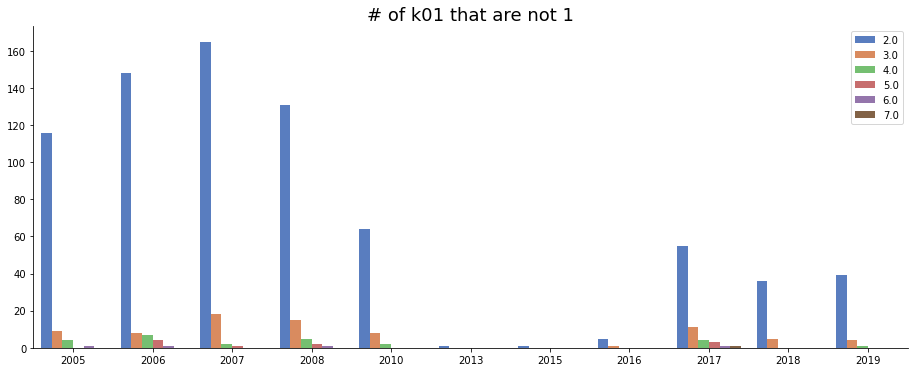

In [62]:
sns.set_palette("muted")

g = sns.factorplot(x='year', y='ID', hue='k01', 
                   data= (pd.DataFrame(data_merged_unique.groupby(["year", "k01"])["ID"].count()).
                          reset_index(level=[0,1]).query("k01 > 1")), 
                   kind='bar', legend=False)

g.fig.set_figheight(5)
g.fig.set_figwidth(14)

plt.legend(loc='upper right')

plt.title("# of k01 that are not 1", fontsize = 18)
plt.xlabel("")
plt.ylabel("")

plt.show();

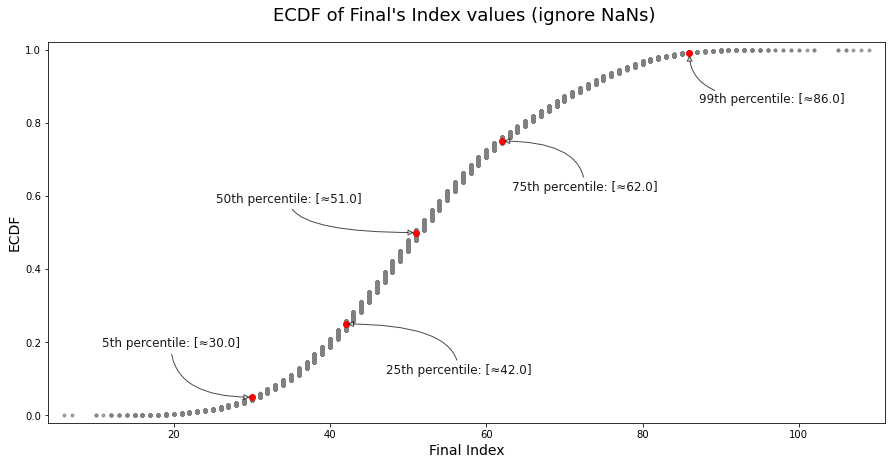

In [63]:
fig_ecdf, ax = plt.subplots(figsize = (15, 7))

x = np.sort(data_merged_unique["k71"])

y = np.arange(1, len(x)+1) / len(x)

_ = plt.plot(x, y, marker='.', linestyle='none', color = "gray", alpha = 0.7)
_ = plt.xlabel('Final Index', fontsize = 14)
_ = plt.ylabel('ECDF', fontsize = 14)
plt.margins(0.02)

percentiles = np.array([5, 25, 50, 75, 99])
ptiles_vers = np.percentile(data_merged_unique["k71"], percentiles)

_ = plt.plot(ptiles_vers, percentiles/100, marker='o', color='red',
         linestyle='none')

plt.annotate(f'99th percentile: [≈{round(np.percentile(data_merged_unique["k71"], 99), 3)}]', 
            xy=(round(np.percentile(data_merged_unique["k71"], 99), 3), 0.99), xytext=(10, -50), 
             textcoords = ('offset pixels'), fontsize = 12, alpha = 0.9,
            arrowprops = dict(facecolor = 'black', arrowstyle="-|>", alpha = 0.7, fc="w",
                              connectionstyle = "angle3, angleA=180, angleB=-90"))
plt.annotate(f'75th percentile: [≈{round(np.percentile(data_merged_unique["k71"], 75), 3)}]', 
            xy=(round(np.percentile(data_merged_unique["k71"], 75), 3), 0.75), xytext=(10, -50), 
             textcoords = ('offset pixels'), fontsize = 12, alpha = 0.9,
            arrowprops = dict(facecolor = 'black', arrowstyle="-|>", alpha = 0.7, fc="w",
                              connectionstyle = "angle3, angleA=-90, angleB=180"))
plt.annotate(f'50th percentile: [≈{round(np.percentile(data_merged_unique["k71"], 50), 3)}]', 
            xy=(round(np.percentile(data_merged_unique["k71"], 50), 3), 0.50), xytext=(-200, 30), 
             textcoords = ('offset pixels'), fontsize = 12, alpha = 0.9,
            arrowprops = dict(facecolor = 'black', arrowstyle="-|>", alpha = 0.7, fc="w",
                              connectionstyle = "angle3, angleA=-90, angleB=180"))
plt.annotate(f'25th percentile: [≈{round(np.percentile(data_merged_unique["k71"], 25), 3)}]', 
            xy=(round(np.percentile(data_merged_unique["k71"], 25), 3), 0.25), xytext=(40, -50), 
             textcoords = ('offset pixels'), fontsize = 12, alpha = 0.9,
            arrowprops = dict(facecolor = 'black', arrowstyle="-|>", alpha = 0.7, fc="w",
                              connectionstyle = "angle3, angleA=-90, angleB=-180"))
plt.annotate(f'5th percentile: [≈{round(np.percentile(data_merged_unique["k71"], 5), 3)}]', 
            xy=(round(np.percentile(data_merged_unique["k71"], 5), 3), 0.05), xytext=(-150, 50), 
             textcoords = ('offset pixels'), fontsize = 12, alpha = 0.9,
            arrowprops = dict(facecolor = 'black', arrowstyle="-|>", alpha = 0.7, fc="w",
                              connectionstyle = "angle3, angleA=-90, angleB=180"))

plt.suptitle("ECDF of Final's Index values (ignore NaNs)", y = 0.95, x = 0.51, fontsize = 18)

fig_ecdf.show()

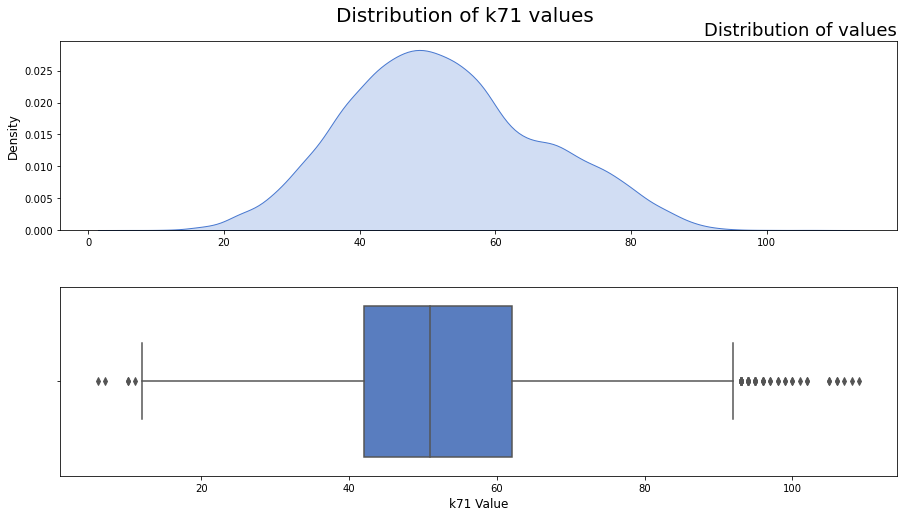

In [64]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey = False, figsize = (15, 8))

sns.kdeplot(data_merged_unique['k71'],shade=True, ax = ax1)

ax1.set_xlabel('')
ax1.set_ylabel('Density', fontsize = 12)

ax1.set_title("Distribution of values", fontsize = 18, loc = 'right')


sns.boxplot(data_merged_unique['k71'], ax = ax2)

ax2.set_xlabel('k71 Value', fontsize = 12)
ax2.set_ylabel('')

plt.subplots_adjust(hspace = 0.3)

fig.suptitle("Distribution of k71 values", y = 0.94, fontsize = 20)

plt.show()

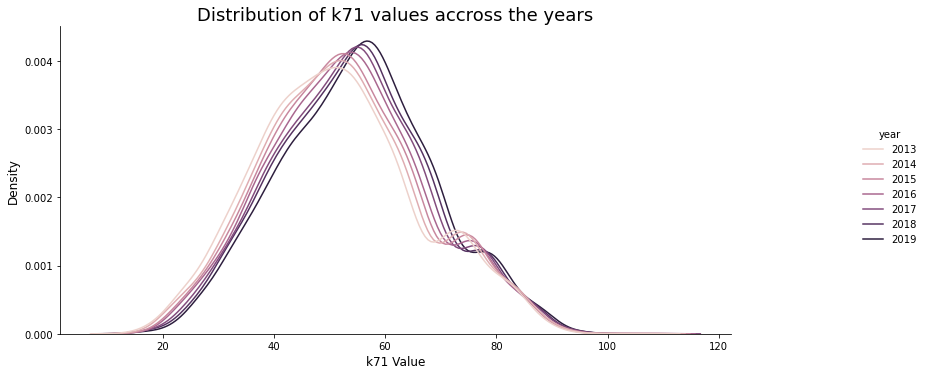

In [65]:
g = sns.displot(data=data_merged_unique.query("year >= 2013"), x='k71', hue="year", kind="kde")

g.fig.set_figheight(5)
g.fig.set_figwidth(14)

plt.xlabel('k71 Value', fontsize = 12)
plt.ylabel('Density', fontsize = 12)

plt.title("Distribution of k71 values accross the years", fontsize = 18)

plt.show();